После того как разметил файл в ручную объединяю все в один файл и делаю класификацию

In [13]:
import pandas as pd

# Загрузка данных
file1_path = r"C:\Users\user\Desktop\Интенсив_4\output_excel_file.csv"  # Файл с категориями
file2_path = r"C:\Users\user\Desktop\Интенсив_4\разметка комментариев 2.csv"  # Основной файл
output_path = r"C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой.csv"  # Новый файл

df_categories = pd.read_csv(file1_path, encoding='utf-8')  # Файл с категориями
df_main = pd.read_csv(file2_path, encoding='utf-8')  # Основной файл для обновления

# Получаем все уникальные категории (разделяем по запятым)
all_categories = set()
for cats in df_categories['categories'].dropna().unique():
    for cat in str(cats).split(','):
        all_categories.add(cat.strip())

# Создаем словарь {id: [категории]} для быстрого поиска
id_to_cats = {}
for _, row in df_categories.iterrows():
    id_val = row['id']
    cats = str(row['categories']).split(',') if pd.notna(row['categories']) else []
    id_to_cats[id_val] = [cat.strip() for cat in cats]

# Добавляем колонки с категориями в основной DataFrame (изначально 0)
for cat in all_categories:
    df_main[cat] = 0

# Проставляем 1 в соответствующие колонки
for idx, row in df_main.iterrows():
    id_val = row['id']
    if id_val in id_to_cats:
        for cat in id_to_cats[id_val]:
            df_main.at[idx, cat] = 1

# Сохраняем новый файл (без перезаписи исходного)
df_main.to_csv(output_path, index=False, encoding='utf-8')

print("Новый файл создан:", output_path)
print("Добавлены категории:", all_categories)

Новый файл создан: C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой.csv
Добавлены категории: {'Нравится скорость отработки заявок', 'Нравится качество работы сотрудников', 'Понравилось выполнение заявки', 'Вопрос решен', 'Нравится качество выполнения заявки', 'Критика'}


Переименовываю колонку критика в плохой отзыв

In [17]:
import pandas as pd

# Путь к файлу
file_path = r"C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой.csv"

# Загрузка данных
df = pd.read_csv(file_path, encoding='utf-8')

# Проверяем, есть ли колонки в файле
if len(df.columns) > 0:
    # Получаем название последней колонки
    last_col_name = df.columns[-1]
    
    # Переименовываем последнюю колонку
    df.rename(columns={last_col_name: "Плохой отзыв"}, inplace=True)
    
    # Перезаписываем исходный файл
    df.to_csv(file_path, index=False, encoding='utf-8')
    print(f"Последняя колонка '{last_col_name}' переименована в 'Плохой отзыв'. Файл обновлён.")
else:
    print("Ошибка: В файле нет колонок для переименования.")

Последняя колонка 'Критика' переименована в 'Плохой отзыв'. Файл обновлён.


Проверяем данные на дубликаты

Всего записей: 2373
Уникальных ID: 2308


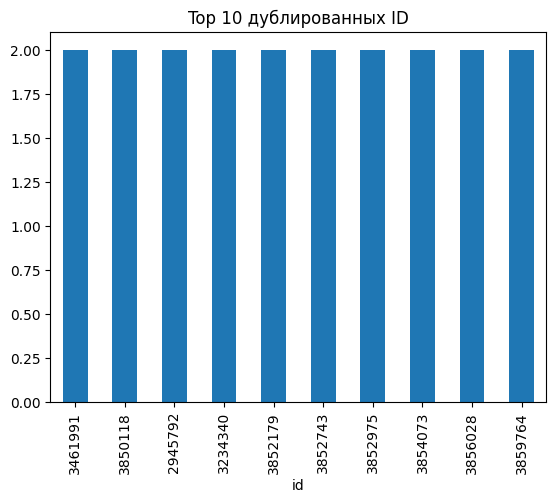

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('разметка_с_разметкой.csv')
print(f"Всего записей: {len(df)}")
print(f"Уникальных ID: {df['id'].nunique()}")

# Визуализация дубликатов
dup_counts = df['id'].value_counts()
dup_counts[dup_counts > 1].head(10).plot(kind='bar')
plt.title('Top 10 дублированных ID')
plt.show()

Удаляем дубликаты 

In [7]:
import pandas as pd

# Укажите путь к вашему файлу
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой.csv'

try:
    # Чтение CSV-файла
    df = pd.read_csv(file_path)
    
    # Проверка наличия столбца 'id'
    if 'id' not in df.columns:
        print("Ошибка: в файле отсутствует столбец 'id'")
    else:
        # Подсчёт строк до обработки
        original_count = len(df)
        
        # Удаление дубликатов по полю 'id' (оставляем первое вхождение)
        df.drop_duplicates(subset=['id'], keep='first', inplace=True)
        
        # Подсчёт удалённых дубликатов
        removed_count = original_count - len(df)
        
        # Перезапись исходного файла
        df.to_csv(file_path, index=False, encoding='utf-8')
        
        print(f"Удалено дубликатов: {removed_count}")
        print(f"Оставлено уникальных записей: {len(df)}")
        print(f"Файл успешно обновлён: {file_path}")

except FileNotFoundError:
    print(f"Ошибка: файл не найден по пути {file_path}")
except Exception as e:
    print(f"Произошла ошибка: {str(e)}")

    import pandas as pd

file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой.csv'
df = pd.read_csv(file_path)

print(f"Исходное количество строк: {len(df)}")
df.drop_duplicates(subset=['id'], keep='first', inplace=True)
print(f"Уникальных записей: {len(df)}")

df.to_csv(file_path, index=False, encoding='utf-8')
print("Файл перезаписан.")

Удалено дубликатов: 0
Оставлено уникальных записей: 2308
Файл успешно обновлён: C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой.csv
Исходное количество строк: 2308
Уникальных записей: 2308
Файл перезаписан.


удаляю колонку rating так как она часто противоречит коментарию

In [8]:
import pandas as pd

# Укажите путь к файлу
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой.csv'

# Чтение файла
df = pd.read_csv(file_path)

# Удаление столбца rating (если он существует)
if 'rating' in df.columns:
    df.drop('rating', axis=1, inplace=True)
    # Перезапись файла
    df.to_csv(file_path, index=False, encoding='utf-8')
    print(f"Столбец 'rating' успешно удалён. Файл перезаписан: {file_path}")
else:
    print("Столбец 'rating' не найден в файле. Изменений не внесено.")

# Вывод первых строк для проверки
print("\nПервые строки обновлённого файла:")
print(df.head())

Столбец 'rating' успешно удалён. Файл перезаписан: C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой.csv

Первые строки обновлённого файла:
        id                                       comment  \
0  2945792                                       спасибо   
1  3234340                                      спасибо!   
2  3380332                                      Отлично    
3  3381812  Благодарю за оперативное решение проблемы !    
4  3461991         Прекрасный специалист! Побольше таких   

   Нравится скорость отработки заявок  Нравится качество выполнения заявки  \
0                                   0                                    0   
1                                   0                                    0   
2                                   0                                    0   
3                                   1                                    0   
4                                   0                                    0   

   Нравится качество работ

Проверим файл на пропуски

In [9]:
import pandas as pd

# Укажите путь к файлу
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой.csv'

# Чтение файла с явным указанием кодировки
try:
    df = pd.read_csv(file_path, encoding='utf-8')  # Можно попробовать 'cp1251' если utf-8 не работает
    
    # 1. Общая статистика пропусков
    print("═"*50)
    print("📊 ОБЩАЯ СТАТИСТИКА ПРОПУСКОВ:")
    print("═"*50)
    print(f"Всего строк в файле: {len(df)}")
    print(f"Всего пропущенных значений: {df.isna().sum().sum()}")
    print(f"Доля пропусков в данных: {df.isna().mean().mean():.2%}")
    
    # 2. Пропуски по столбцам
    print("\n" + "═"*50)
    print("📋 ПРОПУСКИ ПО СТОЛБЦАМ:")
    print("═"*50)
    missing_data = df.isna().sum()
    missing_data = missing_data[missing_data > 0]  # Только столбцы с пропусками
    if len(missing_data) > 0:
        for col, count in missing_data.items():
            print(f"Столбец '{col}': {count} пропусков ({df[col].isna().mean():.2%})")
    else:
        print("Пропусков в столбцах не обнаружено!")
    
    # 3. Строки с пропусками
    print("\n" + "═"*50)
    print("📝 СТРОКИ С ПРОПУСКАМИ:")
    print("═"*50)
    rows_with_missing = df[df.isna().any(axis=1)]
    if len(rows_with_missing) > 0:
        print(f"Найдено строк с пропусками: {len(rows_with_missing)}")
        print("\nПримеры строк с пропусками:")
        print(rows_with_missing.head())
    else:
        print("Строк с пропусками не обнаружено!")
    
    # 4. Дополнительная проверка пустых строк
    print("\n" + "═"*50)
    print("🔍 ПРОВЕРКА ПУСТЫХ СТРОК (''):")
    print("═"*50)
    empty_strings = (df == '').sum()
    empty_strings = empty_strings[empty_strings > 0]
    if len(empty_strings) > 0:
        for col, count in empty_strings.items():
            print(f"Столбец '{col}': {count} пустых строк")
    else:
        print("Пустых строк не обнаружено!")

except FileNotFoundError:
    print(f"Ошибка: файл не найден по пути {file_path}")
except Exception as e:
    print(f"Произошла ошибка: {str(e)}")

══════════════════════════════════════════════════
📊 ОБЩАЯ СТАТИСТИКА ПРОПУСКОВ:
══════════════════════════════════════════════════
Всего строк в файле: 2308
Всего пропущенных значений: 0
Доля пропусков в данных: 0.00%

══════════════════════════════════════════════════
📋 ПРОПУСКИ ПО СТОЛБЦАМ:
══════════════════════════════════════════════════
Пропусков в столбцах не обнаружено!

══════════════════════════════════════════════════
📝 СТРОКИ С ПРОПУСКАМИ:
══════════════════════════════════════════════════
Строк с пропусками не обнаружено!

══════════════════════════════════════════════════
🔍 ПРОВЕРКА ПУСТЫХ СТРОК (''):
══════════════════════════════════════════════════
Пустых строк не обнаружено!


In [12]:
import pandas as pd

# Загрузка CSV-файла
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой.csv'
data = pd.read_csv(file_path)

# Выбор последних 6 колонок
last_six_columns = data.iloc[:, -6:]

# Подсчет нулей и единиц в каждой из последних 6 колонок
count_results = {}
for column in last_six_columns.columns:
    count_zeros = (last_six_columns[column] == 0).sum()
    count_ones = (last_six_columns[column] == 1).sum()
    count_results[column] = {'zeros': count_zeros, 'ones': count_ones}

# Вывод результатов
for column, counts in count_results.items():
    print(f'В колонке "{column}" - нулей: {counts["zeros"]}, единиц: {counts["ones"]}')


В колонке "Нравится скорость отработки заявок" - нулей: 1533, единиц: 775
В колонке "Нравится качество выполнения заявки" - нулей: 2245, единиц: 63
В колонке "Нравится качество работы сотрудников" - нулей: 1996, единиц: 312
В колонке "Понравилось выполнение заявки" - нулей: 2244, единиц: 64
В колонке "Вопрос решен" - нулей: 631, единиц: 1677
В колонке "Плохой отзыв" - нулей: 2116, единиц: 192


создаем колонку рейтинг, которая будет целевой переменной. 

In [14]:
import pandas as pd

# Загрузка CSV-файла
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой.csv'
data = pd.read_csv(file_path)

# Создание новой колонки "rating" с пустыми значениями
data['rating'] = None  # Или используйте np.nan для явного указания NaN

# Сохранение обновленного DataFrame в новый CSV-файл
output_file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой_с_rating.csv'
data.to_csv(output_file_path, index=False)


Создал и заполнил колонку rating, колонки которые начинаются с нравится добавляют 3 балла, вопрос решен добавляет 2 балла, плохой отзыв добавляет 0 баллов. Получается чем больше баллов тем лучше отзыв

In [20]:
import pandas as pd

# Загрузка CSV-файла
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой_обновленный.csv'
data = pd.read_csv(file_path)

# Инициализация колонки "rating" с нулями
data['rating'] = 0

# Обработка строк для заполнения колонки "rating"
for index, row in data.iterrows():
    # Считаем количество единиц в колонках с 3 по 6
    count_ones = row[2:6].sum()  # Индексы 2, 3, 4, 5 соответствуют 3, 4, 5, 6 колонкам
    data.at[index, 'rating'] += count_ones * 3  # Добавляем 3 за каждую единицу

    # Проверяем седьмую колонку
    if row[6] == 1:
        data.at[index, 'rating'] += 2  # Добавляем 2, если в седьмой колонке 1

    # Восьмая колонка ничего не добавляет, так что ничего не делаем

# Сохранение обновленного DataFrame в новый CSV-файл
output_file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой_с_rating.csv'
data.to_csv(output_file_path, index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_5708\2319868193.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[6] == 1:


Смотрим какие значения рейтинга у нас есть, чтобы примерно понять какие классы оценки будут

In [21]:
import pandas as pd

# Загрузка CSV-файла
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой_с_rating.csv'
data = pd.read_csv(file_path)

# Получение уникальных значений и их частоты
rating_counts = data['rating'].value_counts()

# Сортировка значений по индексу
sorted_rating_counts = rating_counts.sort_index()

# Вывод уникальных значений и их частоты
print("Значение | Частота")
print("---------------------")
for value, count in sorted_rating_counts.items():
    print(f"{value:<8} | {count}")


Значение | Частота
---------------------
0        | 192
2        | 1026
3        | 1
5        | 952
8        | 132
11       | 5


Кодируем данные, чтобы с ними можно было работать

In [11]:
import pandas as pd

# Загрузка CSV-файла
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой_с_rating.csv'
data = pd.read_csv(file_path)

# Получение типов данных для всех колонок
data_types = data.dtypes

# Вывод типов данных
print("Типы данных в колонках CSV файла:")
print(data_types)


Типы данных в колонках CSV файла:
id                                       int64
comment                                 object
Нравится скорость отработки заявок       int64
Нравится качество выполнения заявки      int64
Нравится качество работы сотрудников     int64
Понравилось выполнение заявки            int64
Вопрос решен                             int64
Плохой отзыв                             int64
rating                                   int64
dtype: object


In [12]:
import pandas as pd
import re

# Загрузка CSV-файла
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой_с_rating.csv'
data = pd.read_csv(file_path)

# Функция для нормализации текста
def normalize_comment(comment):
    # Приведение к нижнему регистру
    comment = comment.lower()
    # Удаление специальных символов, кроме пробелов
    comment = re.sub(r'[^a-zа-яё0-9\s]', '', comment)
    # Удаление лишних пробелов
    comment = re.sub(r'\s+', ' ', comment).strip()
    return comment

# Применение функции к колонке 'comment'
data['comment'] = data['comment'].apply(normalize_comment)

# Проверка результата
print("Нормализованные комментарии:")
print(data['comment'].head())

# Сохранение обновленного DataFrame в новый CSV-файл (если нужно)
output_file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой_нормализованный.csv'
data.to_csv(output_file_path, index=False)


Нормализованные комментарии:
0                                      спасибо
1                                      спасибо
2                                      отлично
3    благодарю за оперативное решение проблемы
4         прекрасный специалист побольше таких
Name: comment, dtype: object


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Загрузка CSV-файла
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой_с_rating.csv'
data = pd.read_csv(file_path)

# Приведение всех числовых колонок к типу int
data = data.astype({'Нравится скорость отработки заявок': 'int',
                    'Нравится качество выполнения заявки': 'int',
                    'Нравится качество работы сотрудников': 'int',
                    'Понравилось выполнение заявки': 'int',
                    'Вопрос решен': 'int',
                    'Плохой отзыв': 'int',
                    'rating': 'int'})

# Кодирование текстовых данных в колонке 'comment'
label_encoder = LabelEncoder()
data['comment'] = label_encoder.fit_transform(data['comment'])

# Проверка типов данных после преобразования
print("Типы данных после кодирования:")
print(data.dtypes)

# Сохранение обновленного DataFrame в новый CSV-файл (если нужно)
output_file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой_кодированный.csv'
data.to_csv(output_file_path, index=False)


Типы данных после кодирования:
id                                      int64
comment                                 int64
Нравится скорость отработки заявок      int64
Нравится качество выполнения заявки     int64
Нравится качество работы сотрудников    int64
Понравилось выполнение заявки           int64
Вопрос решен                            int64
Плохой отзыв                            int64
rating                                  int64
dtype: object


Выводи корреляционную мартрицу зависимостей на рейтинг

Корреляционная матрица:
                                            id   comment  \
id                                    1.000000  0.510012   
comment                               0.510012  1.000000   
Нравится скорость отработки заявок   -0.018685 -0.125686   
Нравится качество выполнения заявки  -0.009430 -0.020374   
Нравится качество работы сотрудников -0.036850 -0.080803   
Понравилось выполнение заявки         0.017991  0.006726   
Вопрос решен                         -0.175469 -0.125495   
Плохой отзыв                          0.175469  0.125495   
rating                               -0.076672 -0.164661   

                                      Нравится скорость отработки заявок  \
id                                                             -0.018685   
comment                                                        -0.125686   
Нравится скорость отработки заявок                              1.000000   
Нравится качество выполнения заявки                            -0.04821

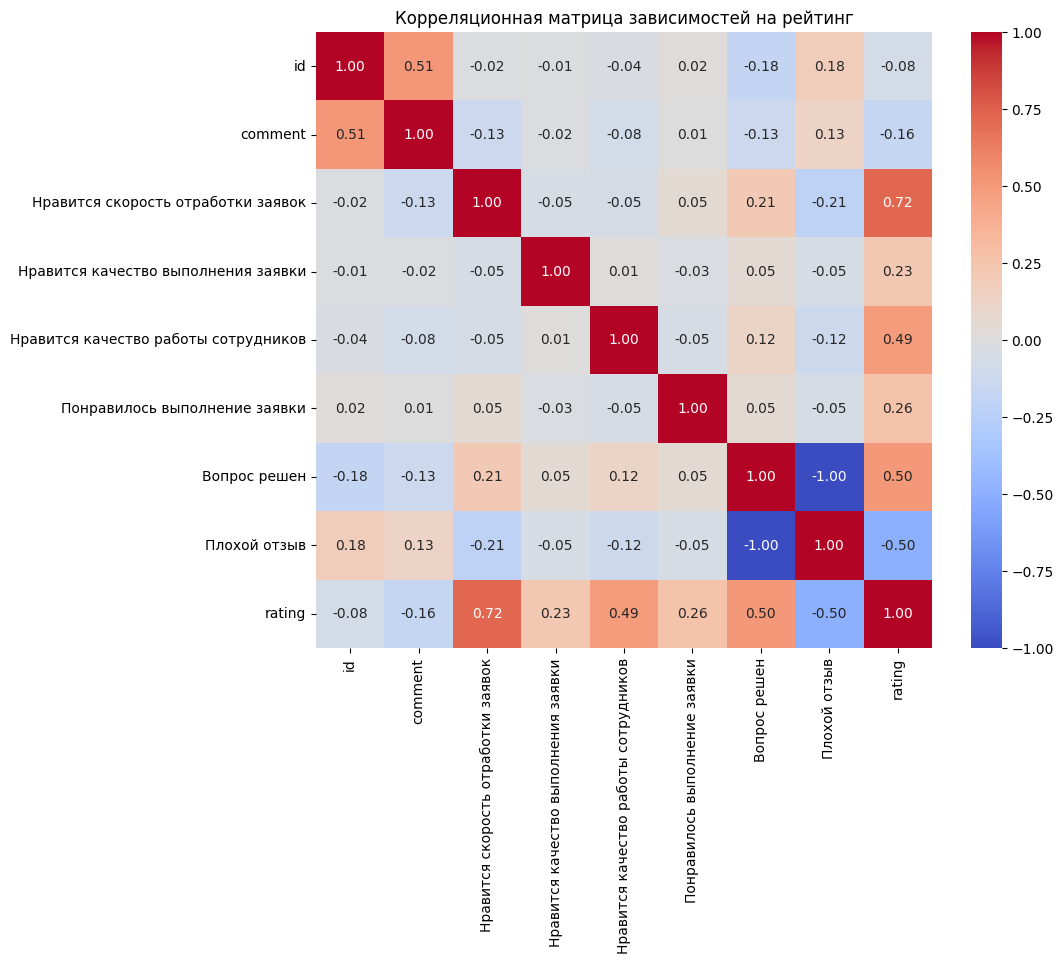

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка CSV-файла
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой_кодированный.csv'
data = pd.read_csv(file_path)

# Вычисление корреляционной матрицы
correlation_matrix = data.corr()

# Вывод корреляционной матрицы
print("Корреляционная матрица:")
print(correlation_matrix)

# Визуализация корреляционной матрицы с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Корреляционная матрица зависимостей на рейтинг')
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Загрузка данных
file_path = r'C:\Users\user\Desktop\Интенсив_4\разметка_с_разметкой_обновленный.csv'
data = pd.read_csv(file_path)

# Определение целевой переменной и признаков
# Преобразуем рейтинги в классы
rating_mapping = {
    0: 1,   # ужасный отзыв - 1 звезда
    2: 3,   # средний отзыв - 3 звезды
    3: 3,   # средний отзыв - 3 звезды
    5: 4,   # хороший отзыв - 4 звезды
    8: 5,   # прекрасный отзыв - 5 звезд
    11: 5   # прекрасный отзыв - 5 звезд
}

data['rating_class'] = data['rating'].map(rating_mapping)

# Разделение данных на обучающую и тестовую выборки
X = data['comment']  # Признаки
y = data['rating_class']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование текстовых данных в числовые с помощью CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Создание и обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vectorized, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_vectorized)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Сохранение модели (если нужно)
import joblib
joblib.dump(model, 'rating_classifier_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.59      0.70        49
           3       0.82      0.96      0.89       191
           4       0.83      0.87      0.85       186
           5       0.91      0.28      0.43        36

    accuracy                           0.83       462
   macro avg       0.85      0.67      0.72       462
weighted avg       0.84      0.83      0.82       462



['vectorizer.pkl']